In [1]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score, 
    roc_curve, 
    roc_auc_score, 
    precision_recall_curve
)

In [2]:
# Download NLTK resources (run this once)
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
def advanced_text_cleaning(text):
    """
    Advanced text cleaning function
    
    Args:
        text (str): Input text to clean
    
    Returns:
        str: Cleaned text
    """
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

In [4]:
def visualize_preprocessing_impact(df):
    """
    Create comprehensive visualizations to show preprocessing impact
    
    Args:
        df (pd.DataFrame): DataFrame with text data
    """
    # Create a copy for preprocessing
    df_processed = df.copy()
    df_processed['clean_text'] = df_processed['clean_text'].apply(advanced_text_cleaning)
    
    # 1. Text Length Comparison
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    df['clean_text'].str.len().hist(bins=50, alpha=0.7)
    plt.title('Original Text Length')
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    
    plt.subplot(132)
    df_processed['clean_text'].str.len().hist(bins=50, alpha=0.7, color='green')
    plt.title('Processed Text Length')
    plt.xlabel('Number of Characters')
    plt.ylabel('Frequency')
    
    plt.subplot(133)
    plt.boxplot([df['clean_text'].str.len(), df_processed['clean_text'].str.len()], 
                labels=['Original', 'Processed'])
    plt.title('Text Length Comparison')
    plt.ylabel('Number of Characters')
    
    plt.tight_layout()
    plt.show()
    
    # 2. Word Count Analysis
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    df['clean_text'].str.split().map(len).hist(bins=50, alpha=0.7)
    plt.title('Original Word Count')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    
    plt.subplot(132)
    df_processed['clean_text'].str.split().map(len).hist(bins=50, alpha=0.7, color='green')
    plt.title('Processed Word Count')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    
    plt.subplot(133)
    plt.boxplot([df['clean_text'].str.split().map(len), 
                 df_processed['clean_text'].str.split().map(len)], 
                labels=['Original', 'Processed'])
    plt.title('Word Count Comparison')
    plt.ylabel('Number of Words')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Category Distribution Before and After
    plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    df['category'].value_counts().plot(kind='bar')
    plt.title('Original Category Distribution')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(122)
    df_processed['category'].value_counts().plot(kind='bar', color='green')
    plt.title('Processed Category Distribution')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 4. Detailed Preprocessing Impact Report
    print("Preprocessing Impact Report:")
    print("\nOriginal Dataset:")
    print(f"Total Rows: {len(df)}")
    print(f"Unique Categories: {df['category'].nunique()}")
    print(f"Average Text Length: {df['clean_text'].str.len().mean():.2f} characters")
    print(f"Average Word Count: {df['clean_text'].str.split().map(len).mean():.2f} words")
    
    print("\nProcessed Dataset:")
    print(f"Total Rows: {len(df_processed)}")
    print(f"Unique Categories: {df_processed['category'].nunique()}")
    print(f"Average Text Length: {df_processed['clean_text'].str.len().mean():.2f} characters")
    print(f"Average Word Count: {df_processed['clean_text'].str.split().map(len).mean():.2f} words")

In [7]:
df = pd.read_csv("/Users/nikhi/Desktop/sentiment_analysis/twitter_Data/Twitter_Data.csv", encoding='ISO-8859-1')
df = df.drop_duplicates().dropna()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_45816\2981269401.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['clean_text'].str.len(), df_processed['clean_text'].str.len()],


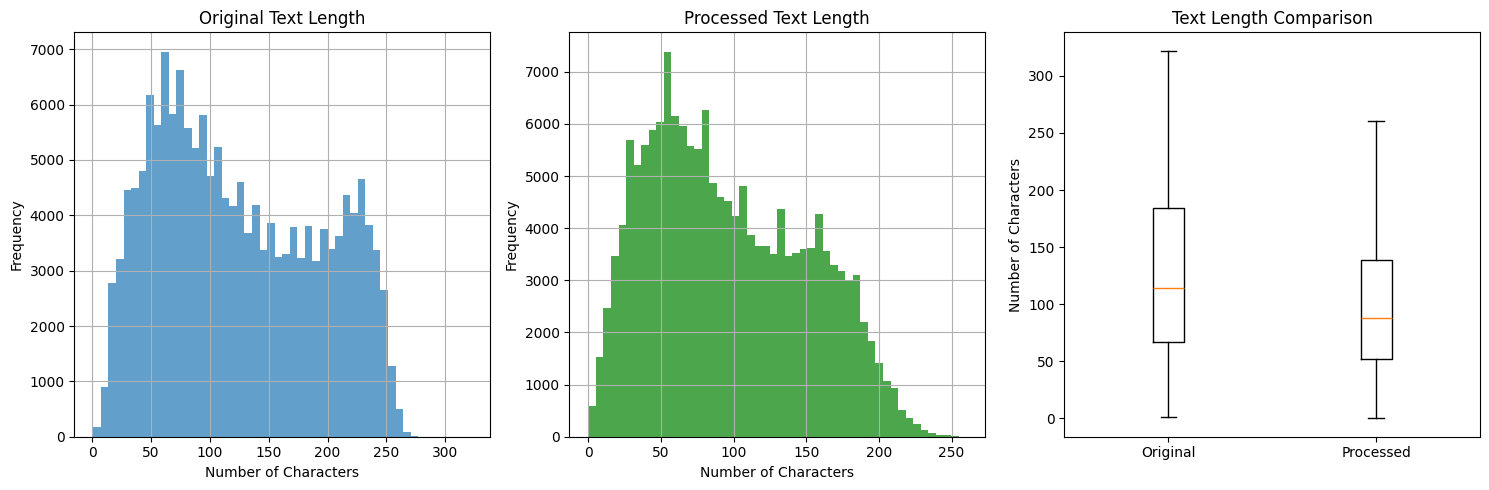

C:\Users\nikhi\AppData\Local\Temp\ipykernel_45816\2981269401.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['clean_text'].str.split().map(len),


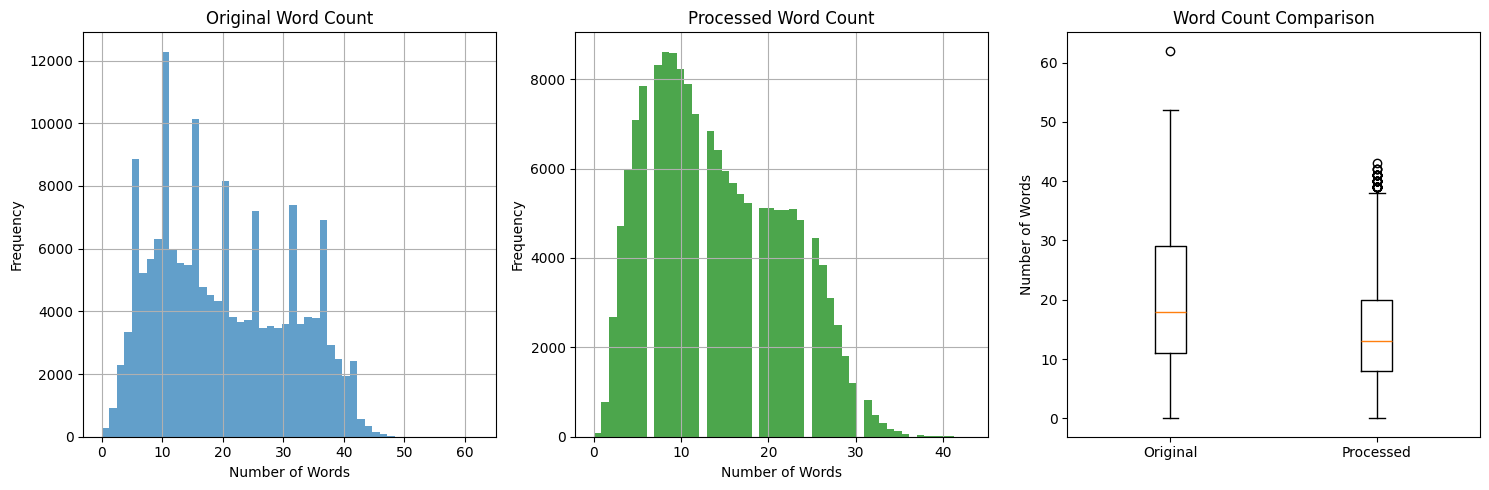

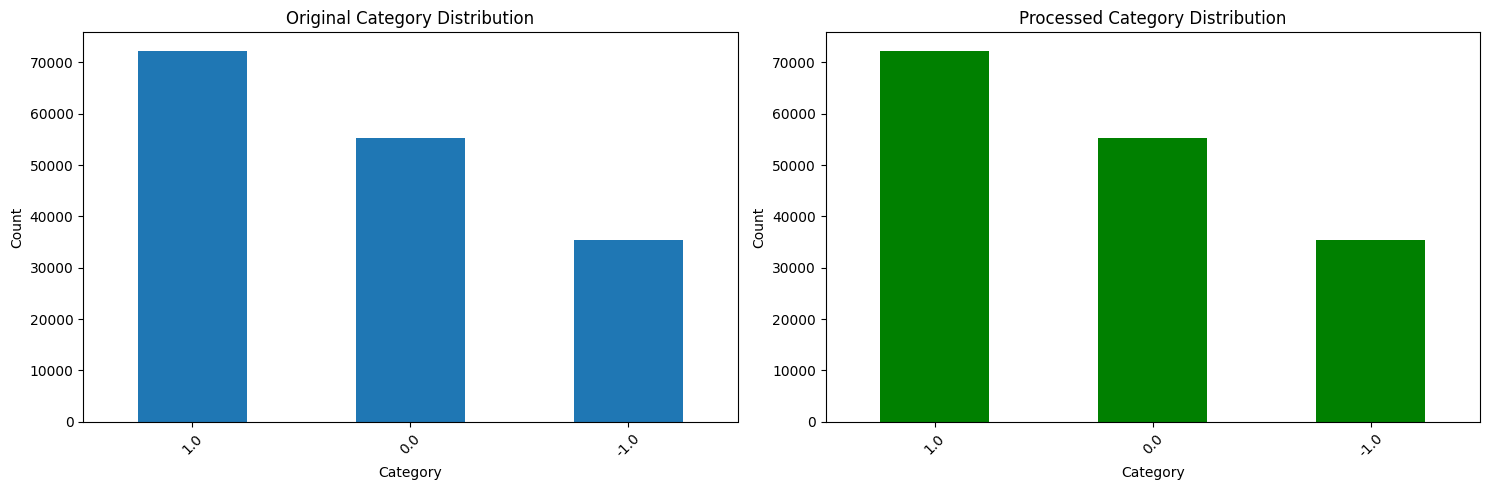

Preprocessing Impact Report:

Original Dataset:
Total Rows: 162969
Unique Categories: 3
Average Text Length: 124.76 characters
Average Word Count: 20.08 words

Processed Dataset:
Total Rows: 162969
Unique Categories: 3
Average Text Length: 96.13 characters
Average Word Count: 14.16 words


In [8]:
visualize_preprocessing_impact(df)

In [33]:
df.head()

,clean_text,category,encoded_labels
0,modi promised minimum government maximum gover...,-1.0,0
1,talk nonsense continue drama vote modi,0.0,1
2,say vote modi welcome bjp told rahul main camp...,1.0,2
3,asking supporters prefix chowkidar names modi ...,1.0,2
4,answer among powerful world leader today trump...,1.0,2


In [30]:
# Apply advanced cleaning
df['clean_text'] = df['clean_text'].apply(advanced_text_cleaning)

In [32]:
# Encode labels
label_encoder = LabelEncoder()
df['encoded_labels'] = label_encoder.fit_transform(df['category'])

In [34]:
# Tokenization and padding
max_words = 50000
max_length = 300

In [37]:
# Prepare data
x = df['clean_text']
y = df['encoded_labels']

In [38]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
x = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


In [39]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [45]:
def create_advanced_model():
    model = keras.Sequential([
        # Embedding layer
        keras.layers.Embedding(input_dim=max_words, output_dim=256, input_length=max_length),
        
        # Convolutional layers with different kernel sizes
        keras.layers.Conv1D(256, 3, activation='relu', padding='same'),
        keras.layers.MaxPooling1D(2),
        keras.layers.Conv1D(128, 5, activation='relu', padding='same'),
        keras.layers.MaxPooling1D(2),
        
        # Bidirectional LSTM for context understanding
        keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
        keras.layers.GlobalMaxPooling1D(),
        
        # Dropout for regularization
        keras.layers.Dropout(0.5),
        
        # Dense layers
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        
        # Output layer - use softmax for multi-class
        keras.layers.Dense(3, activation='softmax')  # Changed to softmax
    ])
    
    # Learning rate scheduling
    lr_schedule = keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-3,
        decay_steps=100,
        decay_rate=0.9
    )
    optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
    
    # Change loss to sparse_categorical_crossentropy
    model.compile(
        optimizer=optimizer, 
        loss='sparse_categorical_crossentropy',  # Changed loss function
        metrics=['accuracy']
    )
    
    return model

In [46]:
# Create and train model
model = create_advanced_model()

In [47]:
# Early stopping and model checkpoint
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=5, 
    restore_best_weights=True
)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    'best_model_twitter.keras', 
    monitor='val_accuracy', 
    save_best_only=True
)

In [48]:
# Train with data augmentation and callbacks
history = model.fit(
    x_train, y_train, 
    epochs=20, 
    batch_size=64, 
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 520s 317ms/step - accuracy: 0.7538 - loss: 0.5993 - val_accuracy: 0.9172 - val_loss: 0.2829
Epoch 2/20
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 509s 312ms/step - accuracy: 0.9318 - loss: 0.2351 - val_accuracy: 0.9160 - val_loss: 0.2824
Epoch 3/20
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 513s 315ms/step - accuracy: 0.9415 - loss: 0.1948 - val_accuracy: 0.9142 - val_loss: 0.2903
Epoch 4/20
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 426s 261ms/step - accuracy: 0.9457 - loss: 0.1864 - val_accuracy: 0.9137 - val_loss: 0.2923
Epoch 5/20
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 312s 192ms/step - accuracy: 0.9454 - loss: 0.1862 - val_accuracy: 0.9137 - val_loss: 0.2927
Epoch 6/20
1630/1630 ━━━━━━━━━━━━━━━━━━━━ 312s 191ms/step - accuracy: 0.9461 - loss: 0.1820 - val_accuracy: 0.9137 - val_loss: 0.2927


In [49]:
# Evaluate model
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

1019/1019 ━━━━━━━━━━━━━━━━━━━━ 25s 24ms/step


In [53]:
def generate_performance_report(model, x_test, y_test, label_encoder):
    """
    Generate comprehensive performance report
    
    Args:
        model (keras.Model): Trained model
        x_test (np.array): Test features
        y_test (np.array): Test labels
        label_encoder (LabelEncoder): Label encoder
    """
    # Predictions
    y_pred_proba = model.predict(x_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    
    # Convert classes to strings explicitly
    target_names = [str(cls) for cls in label_encoder.classes_]
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(
        y_test, y_pred, 
        target_names=target_names
    ))
    
    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', 
                xticklabels=target_names, 
                yticklabels=target_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Optional: Print unique labels for verification
    print("\nUnique Original Labels:", label_encoder.classes_)

In [54]:
# Print original and encoded labels
print("Original Labels:", df['category'].unique())
print("Encoded Labels:", label_encoder.classes_)

Original Labels: [-1.  0.  1.]
Encoded Labels: [-1.  0.  1.]


1019/1019 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.88      0.85      0.87      7102
         0.0       0.90      0.97      0.94     11042
         1.0       0.94      0.91      0.92     14450

    accuracy                           0.92     32594
   macro avg       0.91      0.91      0.91     32594
weighted avg       0.92      0.92      0.92     32594



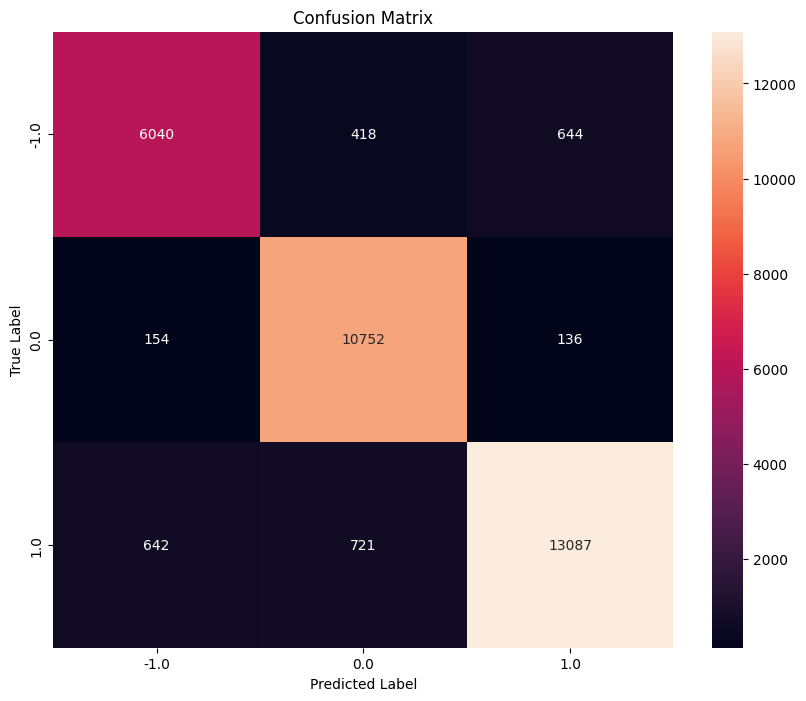

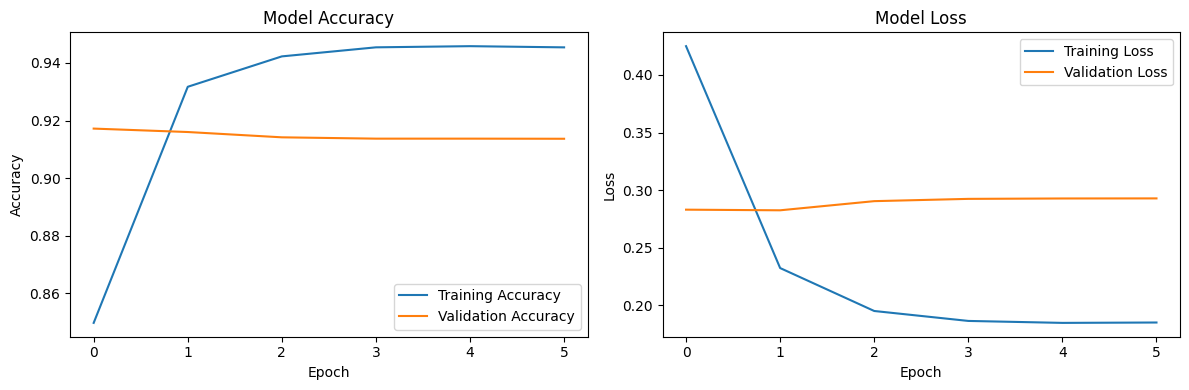


Unique Original Labels: [-1.  0.  1.]


In [55]:
generate_performance_report(model, x_test, y_test, label_encoder)